<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

Ссылка на Github: https://github.com/Borian77/learning_with_tutor.git

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Порядок по выполнению проекта:  
1. Загрузим и подготовим данные для дальнейшего исследования.  
2. Исследуем баланс классов, обучим модель без учёта дисбаланса. Кратко опишем выводы.  
3. Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдем лучшую. Кратко опишем выводы.  
4. Проведем финальное тестирование.

Данные:  
Признаки:  
- RowNumber — индекс строки в данных;  
- CustomerId — уникальный идентификатор клиента;  
- Surname — фамилия;  
- CreditScore — кредитный рейтинг;  
- Geography — страна проживания;  
- Gender — пол;  
- Age — возраст;  
- Tenure — сколько лет человек является клиентом банка;  
- Balance — баланс на счёте;  
- NumOfProducts — количество продуктов банка, используемых клиентом;  
- HasCrCard — наличие кредитной карты;  
- IsActiveMember — активность клиента;  
- EstimatedSalary — предполагаемая зарплата;  
Целевой признак:
- Exited — факт ухода клиента.  

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
#выведем первые 5 строк датафрейма
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
#выведем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
#видим, что есть пропуски в значении Tenure - количество лет, которое человек является клиентом банка
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [6]:
#видим, количество лет указывается целыми числами, преобразуем тип float64 в int64 и заполним пропуски нулевыми значениями
df = df.dropna()
df['Tenure'] = df['Tenure'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   int64  
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.0+ MB


In [7]:
#Проверим на дубликаты
df.duplicated().sum()

0

На основании данных о клиентах нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.
Соответственно:
- Exited - это целевой признак;  
- все остальные столбцы - это признаки, которые влияют на результат классификации.  
Посмотрев на основную информацию о признаках, можно сказать, что One-Hot Encoding и масштабирование нужно применить точечно.  Дополнительно проверим уникальные значения для категориальных признаков, чтобы убедиться в том, что OHE к ним применять имеет смысл.

In [8]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Вывод по шагу 1 "Подготовка данных":

- RowNumber — столбец дублирует информацию стандартного датафрейма и не несетя ценности для обучения модели. Поэтому столбец можно удалить;  
- CustomerId — является идентификатором пользователя (по данному столбцу значению необходимо проверить наличие дубликатов) и если отсутсвуют — стоблец также можно удалить;  
- Surname — является идентифицирующей пользователя информацией, содержит 2932 уникальных значений (данные kaggle), что не несет ценности для качества будущей модели — столбец можно удалить;  
- CreditScore — следует сохранить данный столбец;  
- Geography — всего 3 уникальных значения 'France', 'Spain', 'Germany' — выполнить преобразование OHE / ordinal encoding;  
- Gender — всего 2 уникальных значения 'Female', 'Male' — выполнить преобразование OHE / ordinal encoding;  
- Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited — типы данных верны.
- CreditScore, Balance и EstimatedSalary - применить масштабирование, так как при обучении признак с более высоким значением может быть засчитан как более значимый.

## Исследование задачи

In [10]:
#Обозначим новый датафрейм "data_ml" — данные для машинного обучения, удалим столбцы-идентификаторы, не представляющие ценностия для алгоритма 
df_ml = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
df_ml.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Данные подготовим методом OHE, что позволит нам использовать разные модели и не словить дамми-ловушку
df_ml = pd.get_dummies(df_ml, drop_first=True)
df_ml.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
df_ml.shape

(9091, 12)

Вывод: в новом датафрейме количество столбцов увеличелост на 1 (стало 12) Столбец Geography содержал 3 класса, Gender_Male 2 класса — в результате мы получили только 2 и 1 столбцов соответственно, что позволяет избежать дамми-ловушки.

Сформируем выборки в следующем соотношении:  
обучающая - 0.6, валидационная - 0.2, тестовая - 0.2

In [13]:
#Разделим на признаки и целевой признак
features = df_ml.drop('Exited', axis=1)
target = df_ml['Exited']
#Обучающая 60%
features_train, features_validtest, target_train, target_validtest = train_test_split(features, target, train_size=0.6, 
                                                                                      random_state=12345)
#Валидационная и тестовая соответственно поровну по 20% от общей
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest, target_validtest, 
                                                                            train_size=0.5, random_state=12345)


Вывод: были создана выборки:  
- Обучающая: features_train, target_train;  
- Валидационная: features_valid, target_valid;  
- Тестовая: features_test, target_test.

In [14]:
features_train.shape

(5454, 11)

In [15]:
features_valid.shape

(1818, 11)

In [16]:
features_test.shape

(1819, 11)

In [17]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9344,727,28,2,110997.76,1,1,0,101433.76,0,0,0
3796,537,26,7,106397.75,1,0,0,103563.23,0,0,1
7462,610,40,9,0.00,1,1,1,149602.54,0,0,1
1508,576,36,6,0.00,2,1,1,48314.00,0,0,1
4478,549,31,4,0.00,2,0,1,25684.85,0,0,1


In [18]:
#Для масштабирования методом scaler зафиксируем численные признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [19]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [20]:
#Масштабируем численные признаки обучающей выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9344,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,0,0,0
3796,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,0,0,1
7462,-0.398853,0.090079,1.385532,-1.237830,-0.908179,1,1,0.848738,0,0,1
1508,-0.749875,-0.286389,0.352020,-1.237830,0.809300,1,1,-0.894953,0,0,1
4478,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,0,1,-1.284516,0,0,1


In [21]:
#Масштабируем численные признаки валидационной выборки 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7445,-1.369326,0.560665,-0.336987,-1.237830,-0.908179,1,0,-0.086537,0,0,0
8620,1.232367,0.090079,1.041028,-1.237830,0.809300,0,1,-0.537457,0,0,0
1714,0.840048,0.560665,0.352020,1.231363,-0.908179,0,0,1.070393,1,0,1
5441,1.056856,-0.945210,-1.370498,0.951231,-0.908179,1,0,-0.576279,0,0,1
9001,0.406433,-0.662858,0.352020,0.767800,-0.908179,1,1,0.662068,0,1,1


In [22]:
#Масштабируем численные признаки тестовой выборки 
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5170,1.707279,-0.756975,-0.336987,-1.237830,0.809300,1,1,0.718362,0,0,0
4180,-0.429826,-0.286389,1.730036,0.485538,0.809300,0,0,1.687305,1,0,1
7349,-0.171721,0.278313,0.352020,-0.269213,0.809300,0,1,0.824128,1,0,1
7469,0.385784,-0.380507,1.041028,0.464813,-0.908179,1,0,-1.118018,0,0,0
3467,-1.142194,0.278313,-1.370498,0.353837,0.809300,0,1,-0.107642,1,0,0


Применение модели машинного обучения.  
В результате мы получили масштабированные признаки для трех выборок. Перейдем к обучению моделей.

In [23]:
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=1515)
    DTC_score = model_DTC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_RFC = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=1515)
    RFC_score = model_RFC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    LgR_score = model_LgR.fit(features_train, target_train).score(features_valid, target_valid)
    
    print("Точность:" "дерево решений ", DTC_score, "случайный лес ", RFC_score, "логистческая регрессия", LgR_score)

In [24]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений  0.7821782178217822 случайный лес  0.8635863586358636 логистческая регрессия 0.8085808580858086


Исследование баланса классов выборки

In [25]:
target_train.value_counts(normalize = 1)

0    0.793546
1    0.206454
Name: Exited, dtype: float64

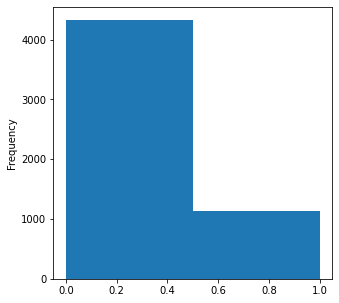

In [26]:
# Построим диаграмму баланса классов
target_train.plot(kind ='hist', bins=2, figsize=(5, 5));

Как мы выяснили в нашей выборке отрицательных ответов около 80% , положитительных - 20%. С можно сказать, что имеется дисбаланс.

Проверка адекватности.  
Проверим качество моделей до борьбы с дисбалансом.

In [27]:
#Напишем функцию для изучия полноты, точности и F1-меры
def rec_prec_f1_auc_roc(target_valid, prediction, features_valid, model):
    print("Полнота:" , recall_score(target_valid, prediction))
    print("Точность:", precision_score(target_valid, prediction))
    print("F1-мера:", f1_score(target_valid, prediction))
    print("Auc_roc:", roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1]))

In [28]:
# Функция для отображения соотношения ответов моделей (сколько 0, сколько 1)
def all_models_share(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=12345)
    model_DTC.fit(features_train, target_train)
    DTC_share = pd.Series(model_DTC.predict(features_valid)).value_counts(normalize = 1)
    
    model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 100)
    model_RFC.fit(features_train, target_train)
    RFC_share = pd.Series(model_RFC.predict(features_valid)).value_counts(normalize = 1)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    model_LgR.fit(features_train, target_train)
    LgR_share = pd.Series(model_LgR.predict(features_valid)).value_counts(normalize = 1)
        
    print("Доли ответов:" "Дерево решений", DTC_share, "Случайный лес ", RFC_share, "Логистческая регрессия", LgR_share , end='')

In [29]:
#Применим функцию отображения соотношения ответов моделей
all_models_share(features_train, target_train, features_valid, target_valid)

Доли ответов:Дерево решений 0    0.794279
1    0.205721
dtype: float64 Случайный лес  0    0.874587
1    0.125413
dtype: float64 Логистческая регрессия 0    0.932343
1    0.067657
dtype: float64

In [30]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()
    plt.show()

Логистичесая регрессия показывала самую высокую точность, далее случайный лес и в конце - дерево решений.  
С учетом дисбаланса результата, неудивительно, что модели с большой вероятностью будут выдавать ответ 0, построим матрицы ошибок для моделей.

Случайный лес

In [31]:
#Случайный лес - подберем лучшие гиперпараметры
best_model = None
best_f1 = 0
for est in tqdm(range(50, 201, 10)):
    for depth in range(2, 15, 3):
        model_RFC = RandomForestClassifier(random_state=12345,
                                              n_estimators=est, 
                                              max_depth=depth)
        model_RFC.fit(features_train, target_train)
        RFC_prediction = model_RFC.predict(features_valid)
        f1_forest = f1_score(target_valid, RFC_prediction)
        if f1_forest > best_f1:
            best_model = model_RFC
            best_f1 = f1_forest
            best_est = est
            best_depth = depth

print('Оптимальное количество оценок:', best_est)
print('Оптимальная глубина дерева:', best_depth)
print('F1-мера:', best_f1)

100%|██████████| 16/16 [00:56<00:00,  3.50s/it]

Оптимальное количество оценок: 110
Оптимальная глубина дерева: 14
F1-мера: 0.5892255892255892


In [32]:
#Обучим модель с оптимальными значениями гиперпараметров
model_RFC = RandomForestClassifier(random_state=12345, 
                                      n_estimators=best_est, 
                                      max_depth=best_depth)
model_RFC.fit(features_train, target_train)
RFC_prediction = model_RFC.predict(features_valid)

In [33]:
rec_prec_f1_auc_roc(target_valid, RFC_prediction, features_valid, model_RFC)

Полнота: 0.46419098143236076
Точность: 0.8064516129032258
F1-мера: 0.5892255892255892
Auc_roc: 0.8631237149268212


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Отдельно построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN:
</div>

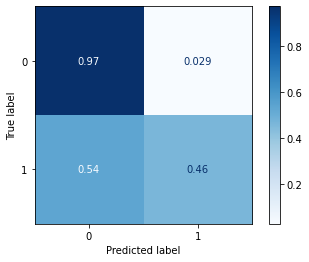

In [34]:
plot_confusion_matrix(estimator=model_RFC, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues')
None

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ROC-кривая для модели Случайного леса:
</div>

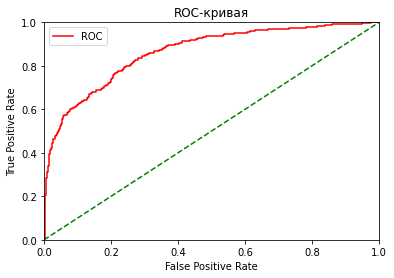

In [35]:
fper, tper, thresholds = roc_curve(target_valid, model_RFC.predict_proba(features_valid)[:, 1])
plot_roc_curve(fper, tper)

Вывод: Случайный лес выдает заметно больше качественных предсказаний, но также сильно склоняется к ложно-позитивным предсказаниям (FP). Точность и качество также низкие.

Дерево решений

In [36]:
#Дерево решений - подберем лучшие гиперпараметры
best_model = None
best_f1 = 0
for depth in range(2, 15, 3):
    model_DTC = DecisionTreeClassifier(random_state=12345,
                                        max_depth=depth)
    model_DTC.fit(features_train, target_train)
    DTC_prediction = model_DTC.predict(features_valid)
    f1_DTC = f1_score(target_valid, DTC_prediction)
    if f1_DTC > best_f1:
        best_model = model_DTC
        best_depth = depth
        best_f1 = f1_DTC

print('Оптимальная глубина дерева:', best_depth) 
print('F1-мера:', best_f1)

Оптимальная глубина дерева: 8
F1-мера: 0.5413290113452188


In [37]:
#Обучим модель с оптимальными значениями гиперпараметров
model_DTC = DecisionTreeClassifier(random_state=12345,
                                    max_depth=best_depth)
model_DTC.fit(features_train, target_train)
DTC_prediction = model_DTC.predict(features_valid)

In [38]:
rec_prec_f1_auc_roc(target_valid, DTC_prediction, features_valid, model_DTC)

Полнота: 0.44297082228116713
Точность: 0.6958333333333333
F1-мера: 0.5413290113452188
Auc_roc: 0.8066826566431725


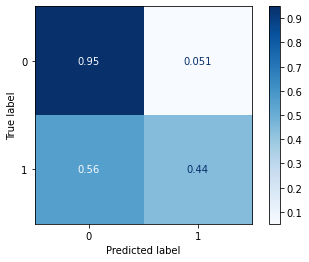

In [39]:
plot_confusion_matrix(estimator=model_DTC, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues')
None

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ROC-кривая для модели Дерева решений:
</div>

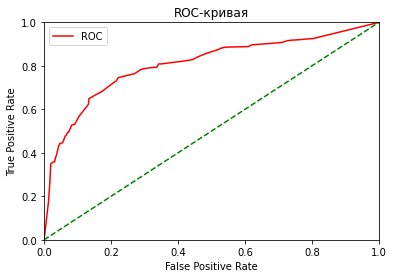

In [40]:
fper, tper, thresholds = roc_curve(target_valid, model_DTC.predict_proba(features_valid)[:, 1])
plot_roc_curve(fper, tper)

Вывод: Матрица показала, что Дерево решений, как и Случайный лес склонно выдавать качественные предсказания, количество ложных позитивных предсказаний (FP) больше, чем у Случайного леса. Видим низкое значение F1, следовательно низкое качество модели, проблема в точности.

Логистическая регрессия

In [41]:
#Логистическая регрессия - подберем лучшие гиперпараметры
model_LgR = LogisticRegression(random_state=12345,
                               solver='liblinear')
#Обучим модель на тренировочной выборке
model_LgR.fit(features_train, target_train)
#Получим предсказания на валидационной выборке
LgR_prediction = model_LgR.predict(features_valid)

In [42]:
rec_prec_f1_auc_roc(target_valid, LgR_prediction, features_valid, model_LgR)

Полнота: 0.20159151193633953
Точность: 0.6178861788617886
F1-мера: 0.30400000000000005
Auc_roc: 0.7736191158144302


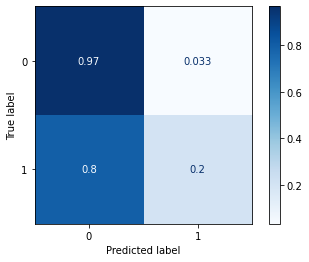

In [43]:
plot_confusion_matrix(estimator=model_LgR, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues')
None

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ROC-кривая для модели Логистической регрессии:
</div>

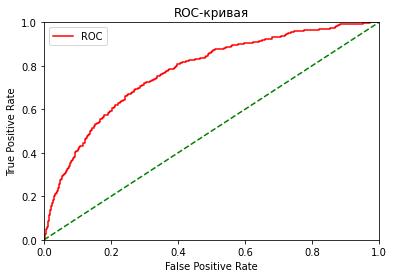

In [44]:
fper, tper, thresholds = roc_curve(target_valid, model_LgR.predict_proba(features_valid)[:, 1])
plot_roc_curve(fper, tper)

Вывод: Отстутсвие улучшений. Довольно высокая точность модели объясняется высокой долей негативных ответов в валидационной выборке.

Вывод по шагу 2 "Исследование задачи":  
- Был сформирован новый датафрейм. Количество столбцов увеличелост на 1 (стало 12) Столбец Geography содержал 3 класса, Gender_Male 2 класса — в результате мы получили только 2 и 1 столбцов соответственно, что позволило избежать дамми-ловушки.  
- Сформировали выборки в следующем соотношении:  
обучающая - 0.6, валидационная - 0.2, тестовая - 0.2.  
- Масштабировали признаки всех трех выборок (Обучающей, валидационной и тестовой).  
- Определили наличие дисбаланса.
- Проверили качество и точность моделей до устранения дисбаланса. Самые выские качества и точность модели показал Случайный лес, далее - Дерево решений и Логистическая регрессия.  
- Построили матрицы ошибок для моделей:  
Случайный лес выдает заметно больше качественных предсказаний. Точность и качество высокие.  Не сильно отличаются значения Дерева решений.
Дерево решений склонно выдавать позитивные предсказания, очень высокое количество ложных позитивных предсказания (FP), низкое значение F1, следовательно низкое качество модели, проблема в точности.  
Логистическая регрессия показала наименьшее значение TP, полнота, точность и F1 хуже, чем у других моделей.  
Матрицы ошибок наглядно демонстрируют сильный дисбаланс классов.  
К примеру, для моделей Дерево решений и Случайный лес ситуация схожая - факт того, что клиент не ушел (0), модели определяют правильно примерно в 95% случаев, в то время как результат предсказаний по факту ухода (1) в среднем всего 45%.

## Борьба с дисбалансом

Как мы выяснили ранее в нашей выборке отрицательны ответов около 80% , положитительных - 20%. Нам необходмо увеличить количество положительных ответов в 4 раза для достижения баланса. Либо уменьшить количество отрицтаельных ответов.

- Разделим обучающую выборку на отрицательные и положительные объекты;  

Для положительных объектов используем определенную нами функцию upsample:  
- Скопируем несколько раз положительные объекты;  
- С учётом полученных данных создадим новую обучающую выборку;  
- Перемешаем данные: идущие друг за другом одинаковые вопросы не помогут обучению;  
- Обучим новые модели.

Для отрицательных объектов используем определенную нами функцию downsample:  
- Уменьшим количество отрицательных объектов;  
- С учётом полученных данных создадим новую обучающую выборку;  
- Перемешаем данные: идущие друг за другом одинаковые вопросы не помогут обучению;  
- Обучим новые модели.

In [45]:
#Определим функцию для увеличения представленного класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
    """Функция принимаем значение признаков (features[]), целевого признака (target[]), repeat(int / float),
    класс который будет увеличен (upsampled_сlass (0 or 1))"""
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0  
              
    return features_upsampled, target_upsampled

In [46]:
#Определим функцию для уменьшения представленного класса в выборке 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [47]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, fraction=0.25)

In [48]:
#Протестируем функцию (верное значение)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 0)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.93893
1    0.06107
Name: Exited, dtype: float64
(18438,)


In [49]:
#Протестируем функцию (верное значение)
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 3)
features_train_upsampled

0

In [50]:
#Применим функцию upsample, увеличим количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

1    0.509964
0    0.490036
Name: Exited, dtype: float64
(8832,)


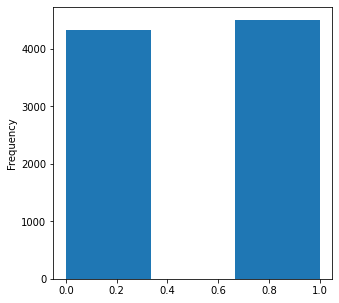

In [51]:
#Визуализируем результат работы функции upsample.
target_train_upsampled.plot(kind ='hist', bins=3, figsize=(5,5));

In [52]:
#Применим функцию downsample, уменьшив количество отрицательных ответов в 4 раза. Протестируем функцию (верное значение)
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, 0.2)
print(target_downsampled_train.value_counts(normalize = 1))
print(target_downsampled_train.shape)

1    0.565261
0    0.434739
Name: Exited, dtype: float64
(1992,)


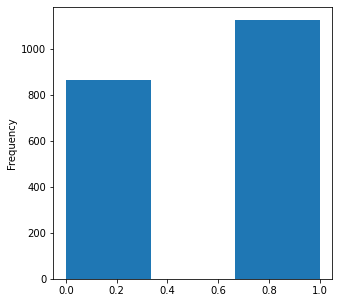

In [53]:
#Визуализируем результат работы функции downsample.
target_downsampled_train.plot(kind ='hist', bins=3, figsize=(5,5));

Обученим модели на сбалансированной выборке

In [54]:
#Точность моделей на выборке с дисбалансом
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений  0.7821782178217822 случайный лес  0.8635863586358636 логистческая регрессия 0.8085808580858086


In [55]:
#Точность моделей на сбалансированной выборке на результатах работы функции upsample
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Точность:дерево решений  0.786028602860286 случайный лес  0.7981298129812981 логистческая регрессия 0.7013201320132013


Точность сильно не изменилась, проверим качество ответов.

In [56]:
#Точность моделей на сбалансированной выборке на результатах работы функции downsample
all_models_accuracy(features_downsampled_train, target_downsampled_train, features_valid, target_valid)

Точность:дерево решений  0.6727172717271728 случайный лес  0.7222222222222222 логистческая регрессия 0.6490649064906491


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Перебор гиперпараметров для увеличенной выборки:
</div>

Случайный лес

11.09.2023. Изменили параметры перебора гиперпараметров, было: tqdm(range(50, 201, 10)), range(2, 15, 3)

In [57]:
#Случайный лес - подберем лучшие гиперпараметры
best_model = None
best_f1 = 0
best_depth = 0
for est in tqdm(range(50, 101, 10)):
    for depth in range(2, 20, 3):
        model_RFC = RandomForestClassifier(random_state=12345,
                                              n_estimators=est, 
                                              max_depth=depth)
        model_RFC.fit(features_train_upsampled, target_train_upsampled)
        RFC_prediction = model_RFC.predict(features_valid)
        f1_forest = f1_score(target_valid, RFC_prediction)
        if f1_forest > best_f1:
            best_model = model_RFC
            best_f1 = f1_forest
            best_est = est
            best_depth = depth

print('Оптимальное количество оценок:', best_est)
print('Оптимальная глубина дерева:', best_depth)

100%|██████████| 16/16 [01:15<00:00,  4.72s/it]

Оптимальное количество оценок: 80
Оптимальная глубина дерева: 14


In [58]:
#Обучим модель "Случайный лес" с лучшими гиперпараметрами
model_RFC = RandomForestClassifier(random_state=12345, 
                                      n_estimators=best_est, 
                                      max_depth=best_depth)
model_RFC.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction = model_RFC.predict(features_valid)

rec_prec_f1_auc_roc(target_valid, RFC_prediction, features_valid, model_RFC)

Полнота: 0.6259946949602122
Точность: 0.6537396121883656
F1-мера: 0.6395663956639566
Auc_roc: 0.8614035346070091


Дерево решений

In [59]:
#Дерево решений - подберем лучшие гиперпараметры
best_model = None
best_f1 = 0
for depth in range(2, 15, 3):
    model_DTC = DecisionTreeClassifier(random_state=12345,
                                        max_depth=depth)
    model_DTC.fit(features_train_upsampled, target_train_upsampled)
    DTC_prediction = model_DTC.predict(features_valid)
    f1_DTC = f1_score(target_valid, DTC_prediction)
    if f1_DTC > best_f1:
        best_model = model_DTC
        best_depth = depth
        best_f1 = f1_DTC

print('Оптимальная глубина дерева:', best_depth) 
print('F1-мера:', best_f1)

Оптимальная глубина дерева: 5
F1-мера: 0.5735449735449736


In [60]:
#Обучим модель "Дерево решений" с лучшими гиперпараметрами
model_DTC = DecisionTreeClassifier(random_state=12345,
                                    max_depth=best_depth)
model_DTC.fit(features_train_upsampled, target_train_upsampled)
DTC_prediction = model_DTC.predict(features_valid)

rec_prec_f1_auc_roc(target_valid, DTC_prediction, features_valid, model_DTC)

Полнота: 0.7188328912466844
Точность: 0.477112676056338
F1-мера: 0.5735449735449736
Auc_roc: 0.8396523192522141


Логистическая регрессия

In [61]:
#Обучим модель "Логистическую регрессию"
model_LgR = LogisticRegression(random_state=12345,
                               solver='liblinear')
model_LgR.fit(features_train_upsampled, target_train_upsampled)
LgR_prediction = model_LgR.predict(features_valid)

rec_prec_f1_auc_roc(target_valid, LgR_prediction, features_valid, model_LgR)

Полнота: 0.7453580901856764
Точность: 0.385989010989011
F1-мера: 0.5085972850678734
Auc_roc: 0.7779006989325494


Вывод по результатам моделей с лучшими гиперпараметрами для увеличенной выборки:

Случайный лес:  
Полнота: 0.6259946949602122  
Точность: 0.6537396121883656  
F1-мера: 0.6395663956639566  
Auc_roc: 0.8614035346070091  

Дерево решений:  
Полнота: 0.7188328912466844  
Точность: 0.477112676056338  
F1-мера: 0.5735449735449736  
Auc_roc: 0.8396523192522141  

Логистическая регрессия:  
Полнота: 0.7453580901856764  
Точность: 0.385989010989011  
F1-мера: 0.5085972850678734  
Auc_roc: 0.7779006989325494  

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Перебор гиперпараметров для уменьшенной выборки:
</div>

Случайный лес

11.09.2023. Изменили параметры перебора гиперпараметров, было: tqdm(range(50, 201, 10)), range(2, 15, 3)

In [62]:
#Случайный лес - подберем лучшие гиперпараметры
best_model = None
best_f1 = 0
best_depth = 0
best_est = 0
for est in tqdm(range(50, 101, 10)):
    for depth in range(2, 20, 3):
        model_RFC = RandomForestClassifier(random_state=12345,
                                              n_estimators=est, 
                                              max_depth=depth)
        model_RFC.fit(features_downsampled_train, target_downsampled_train)
        RFC_prediction = model_RFC.predict(features_valid)
        f1_forest = f1_score(target_valid, RFC_prediction)
        if f1_forest > best_f1:
            best_model = model_RFC
            best_f1 = f1_forest
            best_est = est
            best_depth = depth

print('Оптимальное количество оценок:', best_est)
print('Оптимальная глубина дерева:', best_depth)

100%|██████████| 16/16 [00:31<00:00,  1.98s/it]

Оптимальное количество оценок: 200
Оптимальная глубина дерева: 14


In [63]:
#Обучим модель "Случайный лес" с лучшими гиперпараметрами
model_RFC = RandomForestClassifier(random_state=12345, 
                                      n_estimators=best_est, 
                                      max_depth=best_depth)
model_RFC.fit(features_downsampled_train, target_downsampled_train)
RFC_prediction = model_RFC.predict(features_valid)

rec_prec_f1_auc_roc(target_valid, RFC_prediction, features_valid, model_RFC)

Полнота: 0.8514588859416445
Точность: 0.43437077131258456
F1-мера: 0.575268817204301
Auc_roc: 0.8683109467526421


Дерево решений

In [64]:
#Дерево решений - подберем лучшие гиперпараметры
best_model = None
best_f1 = 0
for depth in range(2, 15, 3):
    model_DTC = DecisionTreeClassifier(random_state=12345,
                                        max_depth=depth)
    model_DTC.fit(features_downsampled_train, target_downsampled_train)
    DTC_prediction = model_DTC.predict(features_valid)
    f1_DTC = f1_score(target_valid, DTC_prediction)
    if f1_DTC > best_f1:
        best_model = model_DTC
        best_depth = depth
        best_f1 = f1_DTC

print('Оптимальная глубина дерева:', best_depth) 
print('F1-мера:', best_f1)

Оптимальная глубина дерева: 5
F1-мера: 0.5485519591141397


In [65]:
#Обучим модель "Дерево решений" с лучшими гиперпараметрами
model_DTC = DecisionTreeClassifier(random_state=12345,
                                    max_depth=best_depth)
model_DTC.fit(features_downsampled_train, target_downsampled_train)
DTC_prediction = model_DTC.predict(features_valid)

rec_prec_f1_auc_roc(target_valid, DTC_prediction, features_valid, model_DTC)

Полнота: 0.8541114058355438
Точность: 0.40401505646173147
F1-мера: 0.5485519591141397
Auc_roc: 0.8370393754705416


Логистическая регрессия

In [66]:
#Обучим модель "Логистическую регрессию"
#model_LgR = LogisticRegression(random_state=12345,
#                               solver='liblinear')
#model_LgR.fit(features_downsampled_train, target_downsampled_train)
#LgR_prediction = model_LgR.predict(features_valid)
#
#rec_prec_f1_auc_roc(target_valid, LgR_prediction, features_valid, model_LgR)

Полнота: 0.8090185676392573
Точность: 0.35017221584385766
F1-мера: 0.48878205128205127
Auc_roc: 0.7786682914348089


Вывод по результатам моделей с лучшими гиперпараметрами для уменьшенной выборки:

Случайный лес:  
Полнота: 0.8514588859416445  
Точность: 0.43437077131258456  
F1-мера: 0.575268817204301  
Auc_roc: 0.8683109467526421    

Дерево решений:  
Полнота: 0.8541114058355438  
Точность: 0.40401505646173147  
F1-мера: 0.5485519591141397  
Auc_roc: 0.8370393754705416   

Логистическая регрессия:  
Полнота: 0.8090185676392573  
Точность: 0.35017221584385766  
F1-мера: 0.48878205128205127  
Auc_roc: 0.7786682914348089   

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Наибольшее значение F1-метрики получено на модели "Случайный лес" при помощи увеличения выборки классов (применения функции upsample). Поэтому для тестирования будем использовать эту модель.
</div>

Вывод по шагу 3 "Борьба с дисбалансом":

Уменьшая и увеличивая количество отрицательных и положительных ответов, соответственно, пришли к тому, для борьбы с дисбалансом увеличение положительных значений дало более сбалансированный ответ, наибольшее значение F1-метрики получено на модели "Случайный лес" при помощи увеличения выборки классов (применения функции upsample). Показаели всех моделей улучшились. Поэтому для тестирования будем использовать эту модель.

На валидационной выборке RandomForestClassifier уже показывает резульаты F1-меры = 0.639, что выше целевого значения.
Значение метрики AUC-ROC всегда стабильно выше F1-score и колеблется в районе 80%.

## Тестирование модели

In [67]:
#Проверим модель с наилучшим значением f1-метрики
#Ранее получили лучшие гиперпараметры для данной модели: Оптимальное количество оценок: 80; Оптимальная глубина дерева: 14
#Применим их 
model_RFC_final = RandomForestClassifier(
    bootstrap = True, max_depth= 14,  n_estimators = 80, random_state=12345)
model_RFC_final.fit(features_train_upsampled, target_train_upsampled)

RandomForestClassifier(max_depth=14, n_estimators=80, random_state=12345)

In [68]:
model_RFC_final_prediction = model_RFC_final.predict(features_test)
rec_prec_f1_auc_roc(target_test, model_RFC_final_prediction, features_test, model_RFC_final)

Полнота: 0.5954415954415955
Точность: 0.6023054755043228
F1-мера: 0.5988538681948424
Auc_roc: 0.8522380586413283


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> F1-мера: 0.5988538681948424, что больше 0.59.  
</div>

In [69]:
#Создадим константную модель
target_predict_constant = pd.Series([0]*len(target_test))
target_predict_constant.value_counts()

0    1819
dtype: int64

In [70]:
target_predict_constant = target_predict_constant.drop(index=1818, axis=0)
target_predict_constant.value_counts()

0    1818
dtype: int64

In [71]:
#Сравним показатель точности (accuracy_score) константной и финальной моделей
print('accuracy_score константой модели:', accuracy_score(target_valid, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_test, model_RFC_final_prediction))
#Сравним AUC-ROC
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_test, model_RFC_final_prediction))
#Сравним F1-меру
print('F1-меру константой модели:', f1_score(target_valid, target_predict_constant))
print('F1-меру финальной модели:', f1_score(target_test, model_RFC_final_prediction))

accuracy_score константой модели: 0.7926292629262927
accuracy_score финальной модели: 0.8460692688290269
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.7507180729251574
F1-меру константой модели: 0.0
F1-меру финальной модели: 0.5988538681948424


Вывод по шагу 4 "Тестирование модели":  
Финальная модель показывает результаты лучше, чем константная модель — модель можно считать адекватной.

Общие выводы по работе:  
    
- Загрузили данные, проверили на пропуски, где возможно было - заменили пропуски, проверили на дубликаты, проанализировали признаки, выявили те, которые не влияют на исследование и удалили их.  
- Подготовили датафрейм для исследования. Был сформирован новый датафрейм.   
- Сформируем выборки в следующем соотношении:  
обучающая - 0.6, валидационная - 0.2, тестовая - 0.2.  
- Масштабировали признаки всех трех выборок (Обучающей, валидационной и тестовой).  
- Определили наличие дисбаланса. В исходных данных наблюдался значительный дисбаланс (около 80% ответов целевого признака были негативными и только около 20% - позитивными), из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели с исходными данными характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1) — модели показывали низкие результаты точности и полноты.
- Построили матрицы ошибок для моделей.  
- Устранили дисбаланс классов в обучающей выборки методами upsampling и downsample — увеличили количество значений позитивного класса в 4 раза, и уменьшили количество значений негативного класса в 4 раза, соответственно. Тем самым достигли лучшего результата баланса классов в обучеющей выборке: 1 - 0.509964; 0 - 0.490036.
- Разобрали несколько вариантов борьбы с дисбалансом upsampling и downsampling
- На сбалансированной выборке все модели показали результат выше, чем на несбалансированной. Лучшие показатели были у модели случайного леса:  
  - Полнота: 0.6259946949602122  
  - Точность: 0.6537396121883656  
  - F1-мера: 0.6395663956639566  
  - Auc_roc: 0.8614035346070091  

- Финальная модель прошла проверку на адекватность в сравнении с контантной моделью:

  - accuracy_score константой модели: 0.7926292629262927  
  - accuracy_score финальной модели: 0.8460692688290269  
  - AUC-ROC константой модели: 0.5  
  - AUC-ROC финальной модели: 0.7507180729251574  
  - F1-меру константой модели: 0.0  
  - F1-меру финальной модели: 0.5988538681948424  

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*